# Tutorat Informatique 2

31/03/2021 - Camille Duquesne

Les trois exercices se font indépendament des uns des autres.

Les compétences travaillés dans ce tutorat sont: 
* utilisation des boucles for
* utilisation de la fonction range()
* utilisation de la condition if
* manipulation de string
* manipulation de liste (append())
* utilisation de librairies (numpy, matplotlib, string, math)
* définition et appel de fonctions
* manipulation de dictionnaires (keys(), values())

## **Exercice 1 - Message codé**

Le but de cet exercice sera de pouvoir coder un message avec une encryption de 'caesar cypher wheel'. https://en.wikipedia.org/wiki/Caesar_cipher
Par exemple 'ok boomer' deviendra 'so fssqiv' avec une clé d'encrytpion de 4.

**Question 1:** Créez un dictionnaire nommé 'alphabet' avec en clé les nombres de 1 à 26 et en valeurs les lettres de l'alphabet.

In [1]:
import string
dictionnaire = {}
for i in range(0,25):
    dictionnaire[string.ascii_lowercase[i]]= i+1
print(dictionnaire)

**Question 2**: Affichez toutes les clefs de votre dictionnaire 'alphabet'.

In [2]:
print(dictionnaire.keys())

**Question 3**: Affichez toutes les valeurs de votre dictionnaire 'alphabet'.

In [3]:
print(dictionnaire.values())

**Question 4**: Transformez votre message en une liste de chaque caractère du message.

In [4]:
message = 'ok boomer'
list_char = []
for i in range(len(message)):
    list_char.append(message[i])
print(list_char)

**Question 5**: Transformez votre liste de caractères, en liste de nombres. Chaque nombre correspond à la position de la lettre dans l'alpahbet (a = 1 et z = 26 par exemple).

In [5]:
list_num = []
for i in range(len(list_char)):
    #print(dictionnaire[list_char[i]])
    if list_char[i] == ' ':
        list_num.append(' ')
    else:
        list_num.append(dictionnaire[list_char[i]])
print(list_num)

**Question 6**: Choisissez une clé d'encryption, soit un entier entre 1 et 26. Ajoutez la valeur de votre clé d'encryption à chaque nombre de votre liste précédente de numéros. 

In [6]:
encrypt_num = 4
for i in range(len(list_num)):
    if list_char[i] == ' ':
        continue
    else:
        list_num[i] = list_num[i] + encrypt_num
print(list_num)

**Question 7:** Retransfrormez votre liste de nombres en lettres en utilisant le dictionnaire.

In [7]:
#On va faire un reverse dictionnaire pcq j'ai oublié que on en aurait besoin 

reverse_dictionnaire = dict((v, k) for k, v in dictionnaire.items())
print(reverse_dictionnaire)

list_message = []
for i in range(len(list_num)):
    if list_num[i] == ' ':
        list_message.append(" ")
    else:
        list_message.append(reverse_dictionnaire[list_num[i]])
print(list_message)

encrypt_message = "".join(list_message)
print(encrypt_message)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y'}
['s', 'o', ' ', 'f', 's', 's', 'q', 'i', 'v']
so fssqiv


**Question 8:** Définissez une fonction 'encryption' qui prend en entrée un message sous forme de string et une clé d'encryption sous forme de nombre. Cette fonction rentournera en sortie le message encrypté sous forme de string.

In [26]:
def encryption(message, encrypt_key):
    import string
    #on définit les 2 dictionnaires qu'on utilisera
    dictionnaire = dict((string.ascii_lowercase[i], i) for i in range(0,25))
    reverse_dictionnaire = dict((v, k) for k, v in dictionnaire.items())
    
    #On définit notre liste de caractères à partir du message
    character_list = [i for i in message]
    
    new_character_list = [] #On stockera les nouveau caractères encryptés dans cette liste
    for i in range(len(character_list)):
        #On regarde si notre caractère est de la ponctuation, et on garde la ponctuation
        if character_list[i] in string.punctuation or character_list[i] == ' ':
            new_character_list.append(character_list[i])
        #Si notre caractère est une lettre, on l'encrypte
        else:
            #On change le caractère en nombre
            number_of_character = dictionnaire[character_list[i]] 
            #On ajoute le nombre d'encryption au nombre du caractère
            encrypted_number = (number_of_character + encrypt_key)%25 #On utilise le modulo 26 pour être sure que notre nombre reste dans le range des lettres de l'alphabet 
            #On retransforme le nouveau nombre en caractère
            encrypted_character = reverse_dictionnaire[encrypted_number]
            #On ajoute le caractère encrypté dans la liste
            new_character_list.append(encrypted_character)
    
    #On transforme la liste de nouveau caractères encyptés en string
    encrypted_message = "".join(new_character_list)
    
    return encrypted_message   
    

**Question 9:** Définissez une fonction 'decryption' qui prend en entrée un message encrypté sous forme de string et une clé d'encryption sous forme de nombre. Cette fonction rentournera en sortie le message décrypté sous forme de string.

In [27]:
def decryption(encrypted_message, encrypt_key):
    import string
    #on définit les 2 dictionnaires qu'on utilisera
    dictionnaire = dict((string.ascii_lowercase[i], i) for i in range(0,25))
    reverse_dictionnaire = dict((v, k) for k, v in dictionnaire.items())
    
    #On définit notre liste de caractères à partir du message
    character_list = [i for i in encrypted_message]
    
    new_character_list = [] #On stockera les nouveau caractères encryptés dans cette liste
    for i in range(len(character_list)):
        #On regarde si notre caractère est de la ponctuation, et on garde la ponctuation
        if character_list[i] in string.punctuation or character_list[i] == ' ':
            new_character_list.append(character_list[i])
        #Si notre caractère est une lettre, on l'encrypte
        else:
            #On change le caractère en nombre
            number_of_character = dictionnaire[character_list[i]] 
            #On ajoute le nombre d'encryption au nombre du caractère
            decrypted_number = (number_of_character - encrypt_key)%25 #On utilise le modulo 26 pour être sure que notre nombre reste dans le range des lettres de l'alphabet 
            #On retransforme le nouveau nombre en caractère
            decrypted_character = reverse_dictionnaire[decrypted_number]
            #On ajoute le caractère encrypté dans la liste
            new_character_list.append(decrypted_character)
    
    #On transforme la liste de nouveau caractères encyptés en string
    decrypted_message = "".join(new_character_list)
    
    return decrypted_message

**Question 10:** Testez vos deux fonction encryption et decryption avec différentes clé d'encyptions et différents messages codés.

In [32]:
print(encryption('ok boomer !', 4))  
print(decryption('so fssqiv !', 4))

#on Encrypte et on decrypte d'un coup
print(decryption(encryption('ok boomer !', 4), 4))

print(encryption('est ce que cette fonction marche vraiment avec un long message ?', 7))  
print(decryption('lab jl xcl jlbbl mvujbpvu thyjol dyhptlub hdlj cu svun tlaahnl ?', 7))

so fssqiv !
ok boomer !
ok boomer !
lab jl xcl jlbbl mvujbpvu thyjol dyhptlub hdlj cu svun tlaahnl ?
est ce que cette fonction marche vraiment avec un long message ?


## **Exercice 2 - Vous avez la carte du magasin ?** 

Vous avez une liste de prix d'articles que vous avez acheté dans la liste 'courses' ci dessous. 

In [34]:
courses = [13, 44.98, 35.0, 17, 25, 7, 3.55, 5.25, 4.98]

**Question 1:** Combien d'articles avez vous acheté ?

In [35]:
print(len(courses))

9


**Question 2:** Quelle est la somme de vos courses ?

In [41]:
print(sum(courses))

#Ou alors

somme = 0
for i in courses:
    somme += i
    
print(somme)

155.76
155.76


**Question 3:** Quel est le prix le plus élevé dans la liste ?

In [43]:
print(max(courses))

#Ou alors

max_item = courses[0]

for i in range(1, len(courses)):
    if courses[i] > max_item:
        max_item = courses[i]
        
print(max_item)

44.98
44.98


**Question 4:** Quel est le prix le plus bas dans la liste ?

In [44]:
print(min(courses))

#Ou alors

min_item = courses[0]

for i in range(1, len(courses)):
    if courses[i] < min_item:
        min_item = courses[i]
        
print(min_item)

3.55
3.55


**Question 5:** Vous souhaitez savoir combien vous auriez économisé si vous aviez eu la carte du magasin. La carte du magasin donne une réduction de 5% pour tout article de plus de 15 euros. Donnez la somme que vous auriez économisé en euros.

In [45]:
#Output: 6.099
    
economie= 0
for i in courses:
    if i > 15:
        economie += i*0.05
print(economie)

6.099


**Question 6:** Créez une fonction 'carte_reduction' qui fait le même calcul que la question 5. Cette fonction prend en entrée une liste de prix d'articles de courses et elle retourne la somme d'argent économisé avec la carte du magasin.

In [46]:
def carte_reduction(liste_de_courses):
    economie= 0
    for i in liste_de_courses:
        if i > 15:
            economie += i*0.05
    return(economie)

**Question 7:** Utilisez votre fonction 'carte_reduction' avec différentes listes d'articles de courses pour voir combien vous économiseriez à chaque fois.

In [48]:
courses1 = [23, 4.98, 30, 1, 2, 2.7, 3.18, 5.45, 14.98]
courses2 = [83, 2.99, 1, 2, 3.2, 4, 6.5, 7.4, 8.9, 1.5, 3, 9.5, 12, 2.7, 5.5, 9.9, 15, 10]
courses3 = [0.7, 7.88, 6.66, 7.12, 3.45, 6.98, 3.89, 6.7, 2, 7.8, 2.2, 6.5, 4.8 ]

print(carte_reduction(courses))
print(carte_reduction(courses1))
print(carte_reduction(courses2))
print(carte_reduction(courses3))

6.099
2.6500000000000004
4.15
0


## **Exercice 3** - Love is in the air

Dans cet exercice nous allons tracer un graphe qui à une forme de coeur. L'équation est la suivante:

**Question 1:** Creer une liste theta, avec 100 valeurs ayant le même écart entre 0 et 2*pi

In [50]:
#Tips: regarder np.linspace()
import math
import numpy as np

theta = np.linspace(0, 2*math.pi, 100)
print(theta)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

**Question 2:** Creer une liste x, selon l'équation donné dans l'énnoncé, qui lie un point de coordoné en x pour chaque point de la liste theta.

In [64]:
x = []
for i in theta:
    x.append(16 * math.sin(i)**3)
    
print(x)

[0.0, 0.0040820584371332996, 0.032459620243681146, 0.10845166250253213, 0.2534598002445025, 0.4860975401805023, 0.8214214865058571, 1.270292671775893, 1.8388914764735926, 2.5284040419434395, 3.3348918737970106, 4.249349701100716, 5.257949840368312, 6.34246455900798, 7.48085148459144, 8.64798119723831, 9.816480986177442, 10.957664534587717, 12.042514171619938, 13.042680410090924, 13.931462842211307, 14.684737117299532, 15.28179465128425, 15.706064848393723, 15.945693837719826, 15.993958888818534, 15.849503584717477, 15.516385283989264, 15.003933162778688, 14.326421948647752, 13.50257309439841, 12.554901351896286, 11.508930268937672, 10.392304845413262, 9.233833278175616, 8.062492263728672, 6.906431622428712, 5.792014010617905, 4.7429241979941565, 3.779379853229186, 2.917472093059084, 2.168659342148844, 1.539432493205195, 1.0311631500206897, 0.6401401047702711, 0.3577923846801229, 0.1710904485560671, 0.06311066477055718, 0.013742292284473073, 0.0005110287600811755, -0.0005110287600811849

**Question 3:** Creer une liste y, selon l'équation donné dans l'énnoncé, qui lie un point de coordoné en y pour chaque point de la liste theta.

In [65]:
y = []
for i in theta:
    y.append(13 * math.cos(i) - 5 * math.cos(2*i) - 2*math.cos(3*i) - math.cos(4*i))
    
print(y)

[5.0, 5.082246634058751, 5.325083816716627, 5.716992295567392, 6.239392688983062, 6.867539048506324, 7.571700996856079, 8.318570459349798, 9.07281734481298, 9.798711272287777, 10.461723979327065, 11.030029492997972, 11.475826306710855, 11.77641721268863, 11.914997367166663, 11.881118682984466, 11.670817674249239, 11.286413262214726, 10.735999624253228, 10.032675826481944, 9.193567754310441, 8.238707963216545, 7.18984497048066, 6.069254921488402, 4.8986254978579336, 3.698074673944052, 2.4853560154839194, 1.2752884116848242, 0.07943237161334082, -1.0939816627783931, -2.2398840505843345, -3.355982097676404, -4.4422011090221085, -5.500000000000003, -6.531617708612882, -7.539309317136663, -8.524629441970145, -9.487815254835095, -10.427312877546857, -11.339479486552223, -12.218480087890283, -13.05638351369949, -13.843447740506003, -14.568571120910935, -15.21987446347863, -15.785369866255687, -16.253666398542343, -16.614660501719065, -16.86016046555071, -16.984399401025453, -16.98439940102545

**Question 4:** Tracer le graphe grâce à la librairie matplotlib et avec les listes x et y calculés dans les questions précédentes.

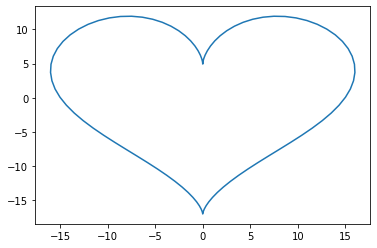

In [66]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()